In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas 
import matplotlib.pyplot as plt 

customer_segmentation_data = "customer_segmentation_data.csv"

cs_df = pd.read_csv(customer_segmentation_data)

cs_df = pd.DataFrame(cs_df)

cs_df


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


# Relationship Comparison: Premium Amount vs. Age

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Establish the Age bins
age_bins = [0, 25, 40, 55, 70]
bins_labels = ["<25", "25-40","40-55", "55-70"]
customer_segmentation_df_copy = cs_df.copy()
customer_segmentation_df_copy["Age Range"] = pd.cut (x = customer_segmentation_df_copy["Age"], bins = age_bins, labels = bins_labels, include_lowest=True)

familypolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Family', ['Age Range', 'Premium Amount']]
avg_premium_by_age_familypolicy = familypolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_familypolicy.name = "Avg_Premium_Family"

businesspolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Business', ['Age Range', 'Premium Amount']]
avg_premium_by_age_businesspolicy = businesspolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_businesspolicy.name = "Avg_Premium_Business"

grouppolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Group', ['Age Range', 'Premium Amount']]
avg_premium_by_age_grouppolicy = grouppolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_grouppolicy.name = "Avg_Premium_Group"

individualpolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Individual', ['Age Range', 'Premium Amount']]
avg_premium_by_age_individualpolicy = individualpolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_individualpolicy.name = "Avg_Premium_Individual"

avg_premium_by_age_df = pd.merge (avg_premium_by_age_familypolicy, avg_premium_by_age_businesspolicy, how = "left", on = ["Age Range"])
avg_premium_by_age_df = pd.merge (avg_premium_by_age_df, avg_premium_by_age_grouppolicy, how = "left", on = ["Age Range"])
avg_premium_by_age_df = pd.merge (avg_premium_by_age_df, avg_premium_by_age_individualpolicy, how = "left", on = ["Age Range"])

avg_premium_by_age_df

,Avg_Premium_Family,Avg_Premium_Business,Avg_Premium_Group,Avg_Premium_Individual
Age Range,,,,
<25,2985.098990,3031.422367,3032.702529,3027.172735
25-40,2967.640714,3042.021329,3069.066564,3021.361734
40-55,2939.774023,2987.931937,3015.364277,3025.240924
55-70,2973.495512,3080.780800,3054.264816,3084.010950


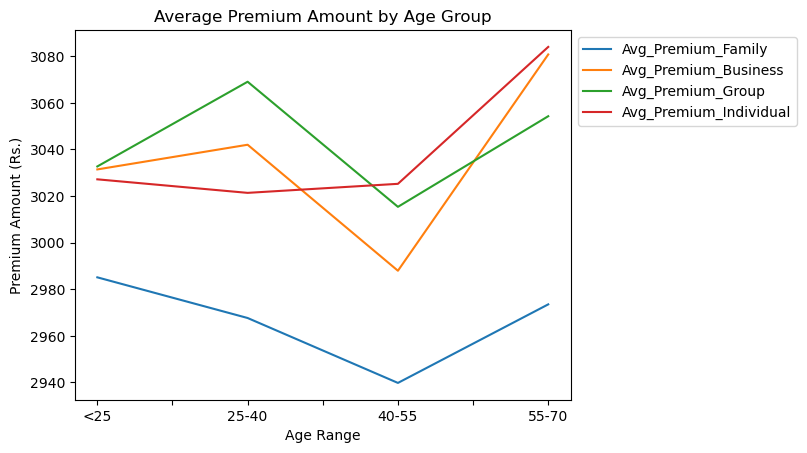

In [3]:
avg_premium_by_age_plot = avg_premium_by_age_df.plot.line ()
avg_premium_by_age_plot.set_ylabel ("Premium Amount (Rs.)")
avg_premium_by_age_plot.set_title ("Average Premium Amount by Age Group")
avg_premium_by_age_plot.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()